In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "Dataset .csv"
dataset = pd.read_csv(file_path)

In [5]:
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Level 3

# Task 1: Predictive Modeling

# a regression model to predict the aggregate rating of a restaurant based on available features.

In [27]:
features = ['Price range', 'Has Table Booking Encoded', 'Has Online Delivery Encoded', 'Name Length', 'Address Length']
target = 'Aggregate rating'
X = dataset[features]
y = dataset[target]

In [29]:
X

,Price range,Has Table Booking Encoded,Has Online Delivery Encoded,Name Length,Address Length
0,3,1,0,16,71
1,3,1,0,16,67
2,4,1,0,22,56
3,4,0,0,4,70
4,4,1,0,11,64
...,...,...,...,...,...
9546,3,0,0,11,103
9547,3,0,0,12,77
9548,4,0,0,5,73
9549,4,0,0,11,75


In [33]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

# Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

# linear Regression

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [44]:
lr_model = LinearRegression()

In [46]:
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("\nLinear Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MSE: 1.7508415154765218
R2 Score: 0.2262444869087431


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)

In [52]:
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Performance:
MSE: 2.849846371545827
R2 Score: -0.25944257201746024


# Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

In [60]:
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MSE: 2.1716493467548053
R2 Score: 0.040275410595785655


# Task 2: Customer Preference Analysis

# Analyze the relationship between the type of cuisine and the restaurant's rating.

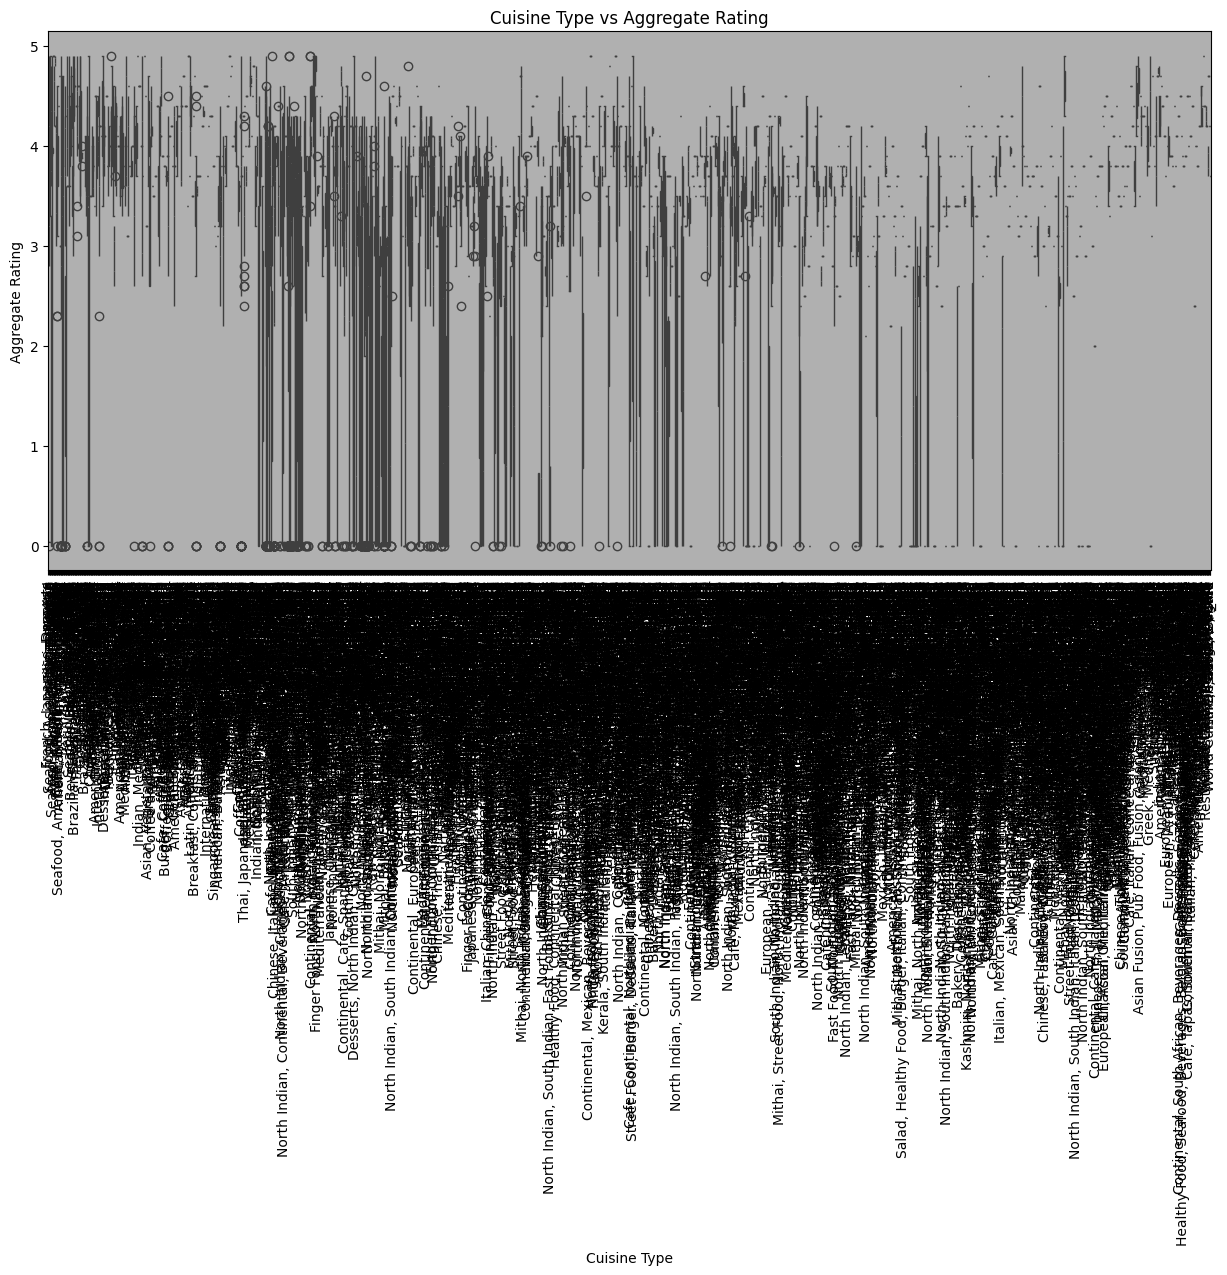

In [72]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=dataset)
plt.xticks(rotation=90)
plt.title("Cuisine Type vs Aggregate Rating")
plt.xlabel("Cuisine Type")
plt.ylabel("Aggregate Rating")
plt.grid(True)
plt.show()

# Identify the most popular cuisines among customers based on the number of votes.


Most Popular Cuisines by Votes:
 Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


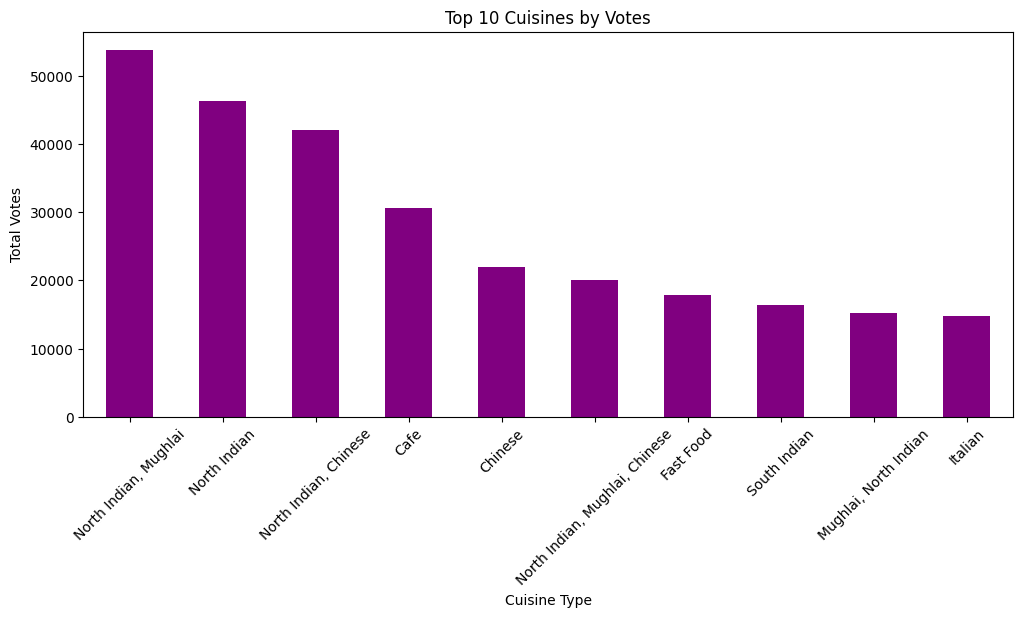

In [75]:
popular_cuisines = dataset.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
print("\nMost Popular Cuisines by Votes:\n", popular_cuisines)
plt.figure(figsize=(12, 5))
popular_cuisines.plot(kind='bar', color='purple')
plt.title("Top 10 Cuisines by Votes")
plt.xlabel("Cuisine Type")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)
plt.show()

# Determine if there are any specific cuisines that tend to receive higher ratings.


Top Rated Cuisines:
 Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


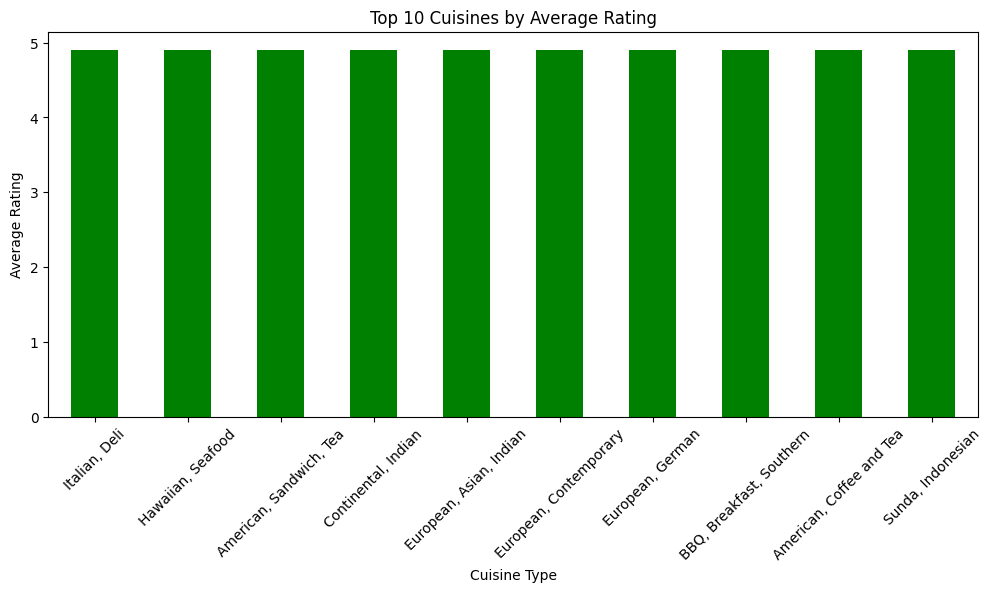

In [78]:
highest_rated_cuisines = dataset.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("\nTop Rated Cuisines:\n", highest_rated_cuisines)
plt.figure(figsize=(12, 5))
highest_rated_cuisines.plot(kind='bar', color='green')
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Cuisine Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# Task 3: Data Visualization

# the distribution of ratings.

# Histogram

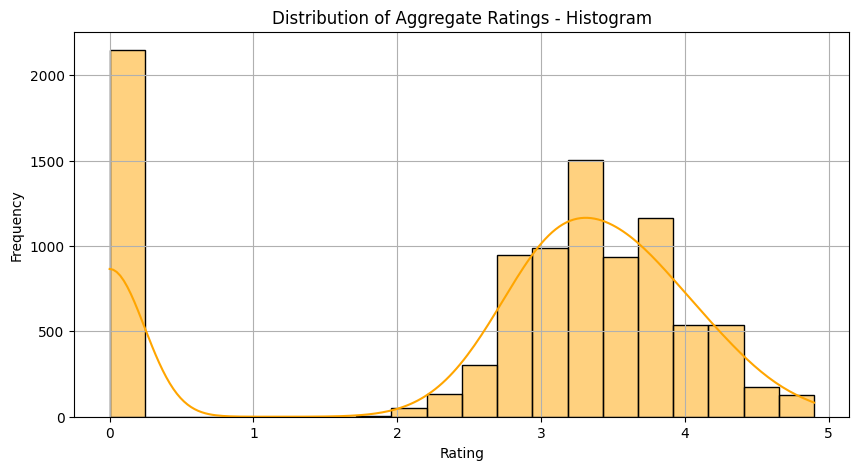

In [93]:
plt.figure(figsize=(10, 5))
sns.histplot(dataset["Aggregate rating"], bins=20, kde=True, color="orange")
plt.title("Distribution of Aggregate Ratings - Histogram")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplot

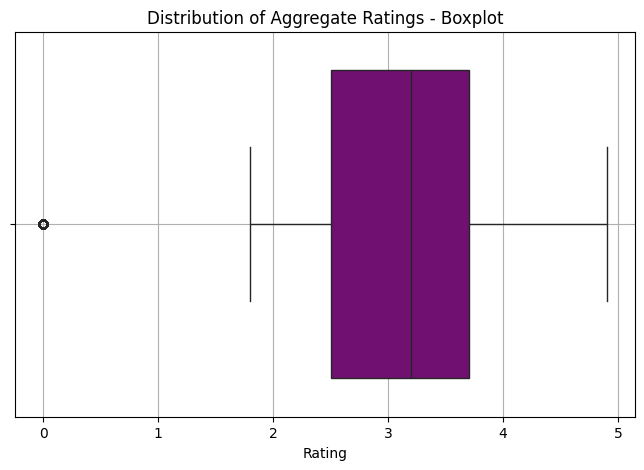

In [85]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset["Aggregate rating"], color="purple")
plt.title("Distribution of Aggregate Ratings - Boxplot")
plt.xlabel("Rating")
plt.grid(True)
plt.show()

# Violin Plot

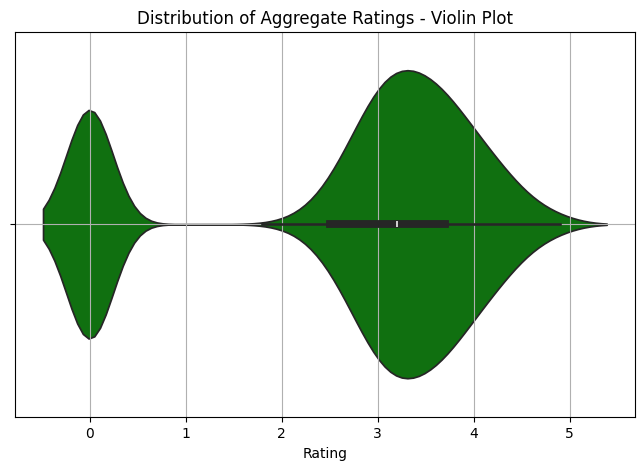

In [91]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=dataset["Aggregate rating"], color="green")
plt.title("Distribution of Aggregate Ratings - Violin Plot")
plt.xlabel("Rating")
plt.grid(True)
plt.show()

# Comparison of the average ratings of different cuisines or cities.

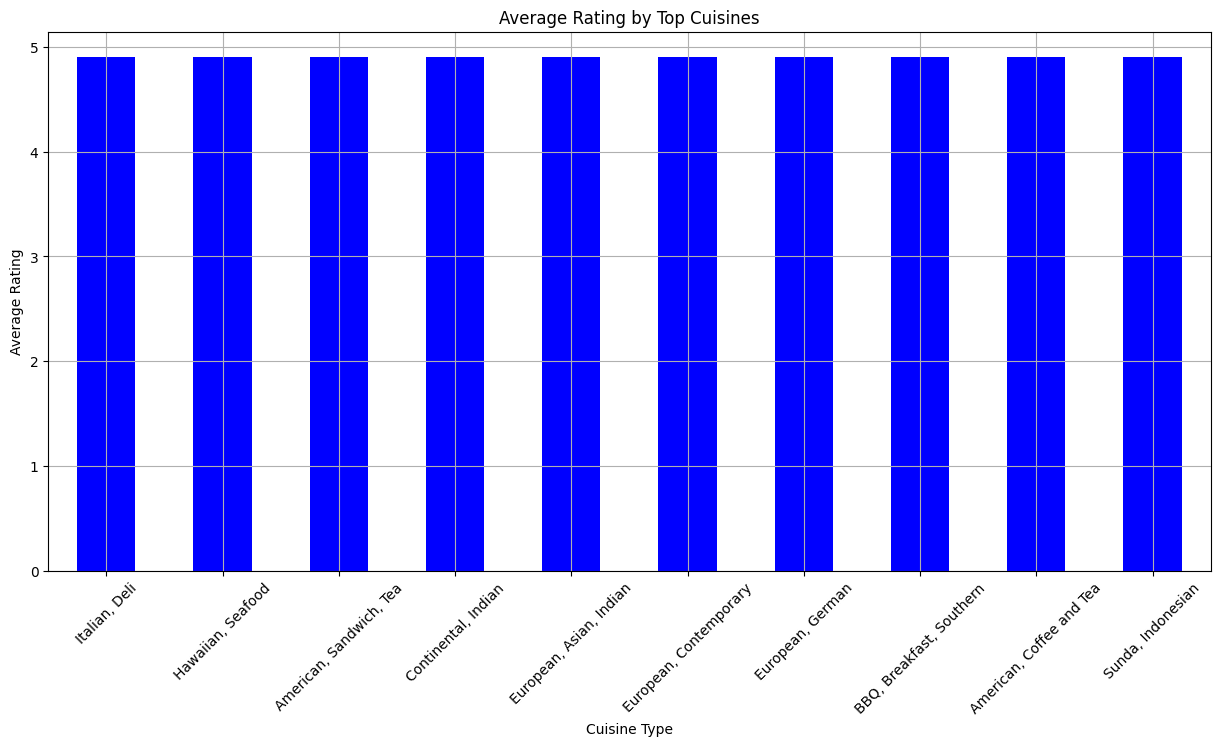

In [98]:
# Average Ratings by Cuisine

avg_rating_cuisine = dataset.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 7))
avg_rating_cuisine.plot(kind='bar', color='blue')
plt.title("Average Rating by Top Cuisines")
plt.xlabel("Cuisine Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

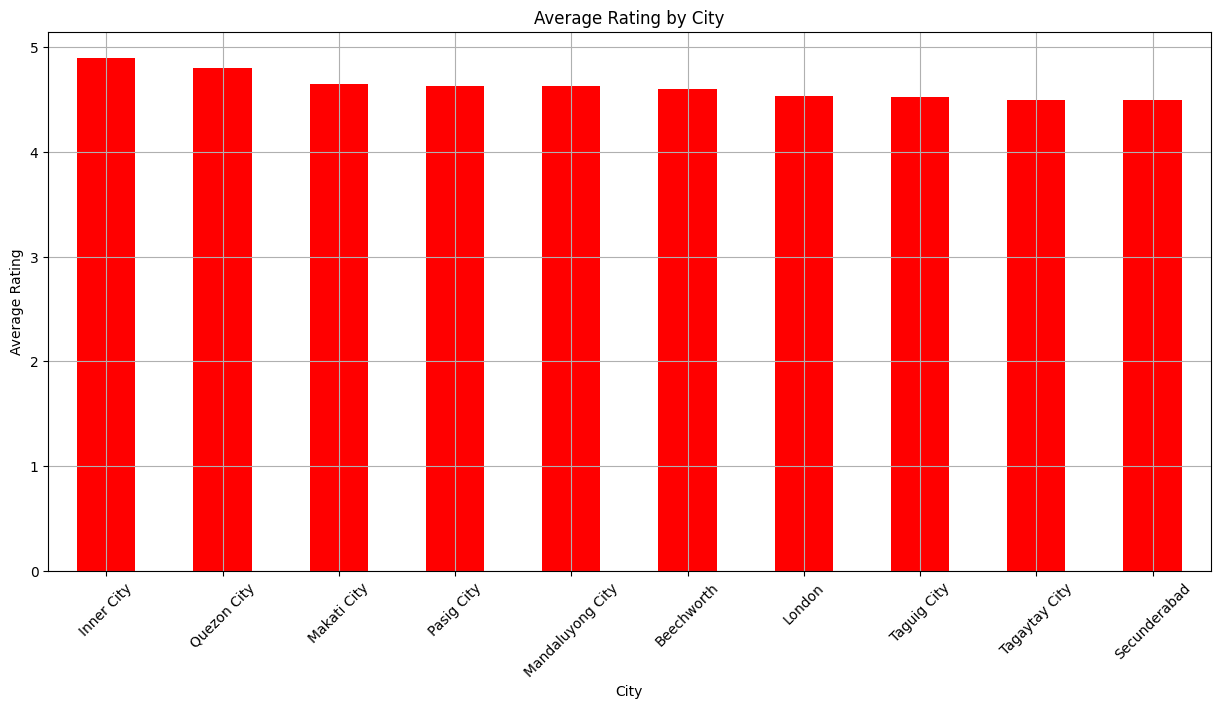

In [100]:
# Average Ratings by City

avg_rating_city = dataset.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 7))
avg_rating_city.plot(kind='bar', color='red')
plt.title("Average Rating by City")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# relationship between various features and the target variable to gain insights.

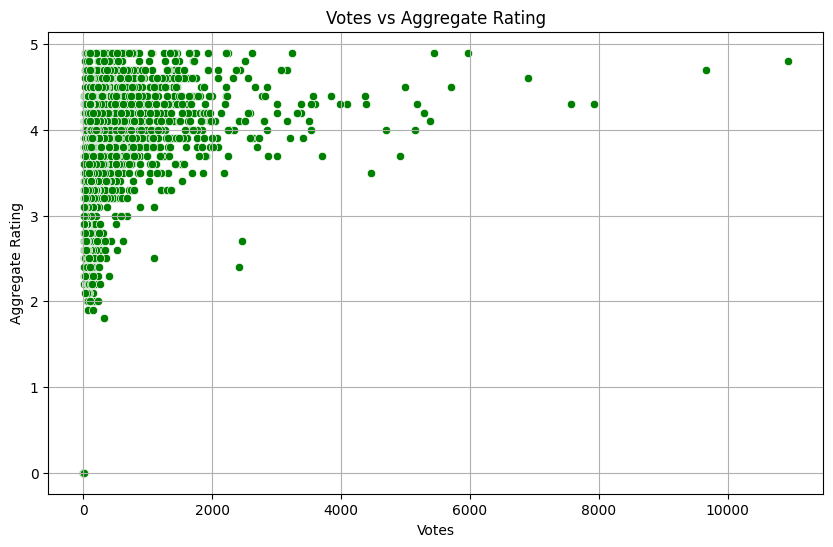

In [103]:
# Relationship between Votes and Rating

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=dataset, color='green')
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.grid(True)
plt.show()